# Logistic Regression

## Generate data

Below, we simulate data.

* $X_1 \sim \mathcal{N}(0, 1)$
* $X_2 \sim \mathcal{N}(0, 1)$
* $Y_0 = 1 + 2X_1 + 3X_2 + \sigma$
* $Y_1 = \frac{1}{1 + \exp(-Y_0)}$
* $y \sim \mathcal{Binom}(Y_1)$

In [1]:
set.seed(37)

getData <- function(N=1000) {
    x1 <- rnorm(N, mean=0, sd=1)
    x2 <- rnorm(N, mean=0, sd=1)
    y <- 1 + 2.0 * x1 + 3.0 * x2 + rnorm(N, mean=0, sd=1)
    y <- 1.0 / (1.0 + exp(-y))
    y <- rbinom(n=N, size=1, prob=y)
    
    df <- data.frame(x1=x1, x2=x2, y=y)
    return(df)
}

T <- getData()

## Learn model

In [2]:
T.glm <- glm(y ~ ., data=T, family='binomial')

## Model summary

In [3]:
s <- summary(T.glm)
print(s)


Call:
glm(formula = y ~ ., family = "binomial", data = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6606  -0.4852   0.1718   0.5749   3.1750  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.76923    0.09819   7.834 4.73e-15 ***
x1           1.65679    0.12710  13.036  < 2e-16 ***
x2           2.33642    0.15887  14.706  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1341.0  on 999  degrees of freedom
Residual deviance:  724.4  on 997  degrees of freedom
AIC: 730.4

Number of Fisher Scoring iterations: 6



## Coefficients

In [4]:
c <- coef(T.glm)
print(c)

(Intercept)          x1          x2 
  0.7692327   1.6567857   2.3364192 


## Coefficient odds ratio

In [5]:
r <- exp(coef(T.glm))
print(r)

(Intercept)          x1          x2 
   2.158110    5.242433   10.344130 


## Coefficient confidence intervals

In [6]:
c <- confint(T.glm, parm=c('(Intercept)', 'x1', 'x2'), level=0.9)
print(c)

Waiting for profiling to be done...


                  5 %      95 %
(Intercept) 0.6099468 0.9332643
x1          1.4539208 1.8724018
x2          2.0839108 2.6069642


## Odds ratio with confidence intervals

Odds ratio with `95% confidence interval`.

In [7]:
r <- exp(cbind(OR = coef(T.glm), confint(T.glm)))
print(r)

Waiting for profiling to be done...


                   OR    2.5 %    97.5 %
(Intercept)  2.158110 1.785862  2.625583
x1           5.242433 4.122292  6.788710
x2          10.344130 7.671212 14.310031


## Fitted values

In [8]:
f <- fitted(T.glm)
for (yPred in f[1:10]) {
    print(yPred)
}

[1] 0.8910464
[1] 0.964862
[1] 0.7248362
[1] 0.4152708
[1] 0.9679192
[1] 0.957294
[1] 0.1023513
[1] 0.9986132
[1] 0.7020388
[1] 0.0302791


## R-squared

Here, we use `McFadden's r-squared` to compute the `goodness-of-fit`.

In [9]:
logLik <- function(T, model) {
    scores <- fitted(model)
    scores <- sum(-log(1 + exp(scores))) + sum(T$y * scores)
    return(scores)
}

T.null <- glm(y ~ 1, family='binomial', data=T)

r <- 1 - logLik(T, T.glm) / logLik(T, T.null)
print(r)

[1] 0.162139


## Diagnostic plots

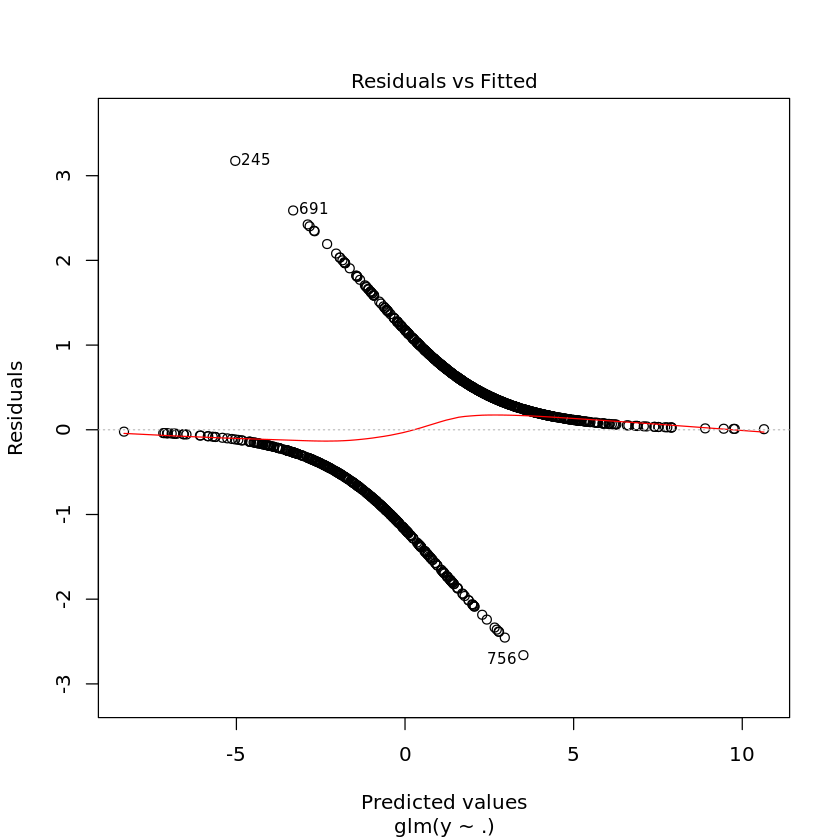

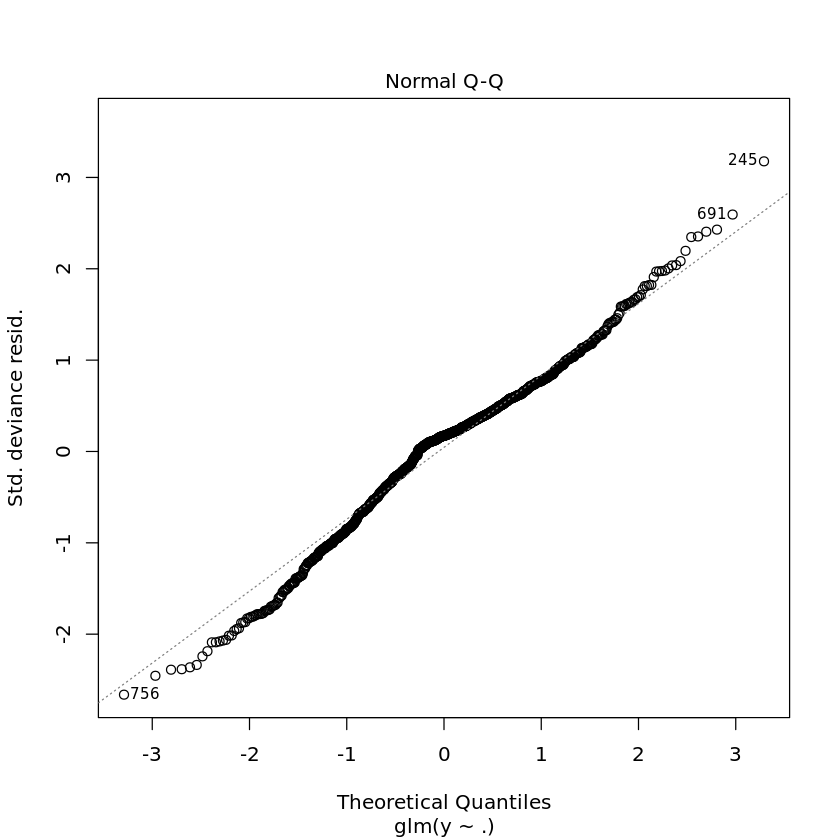

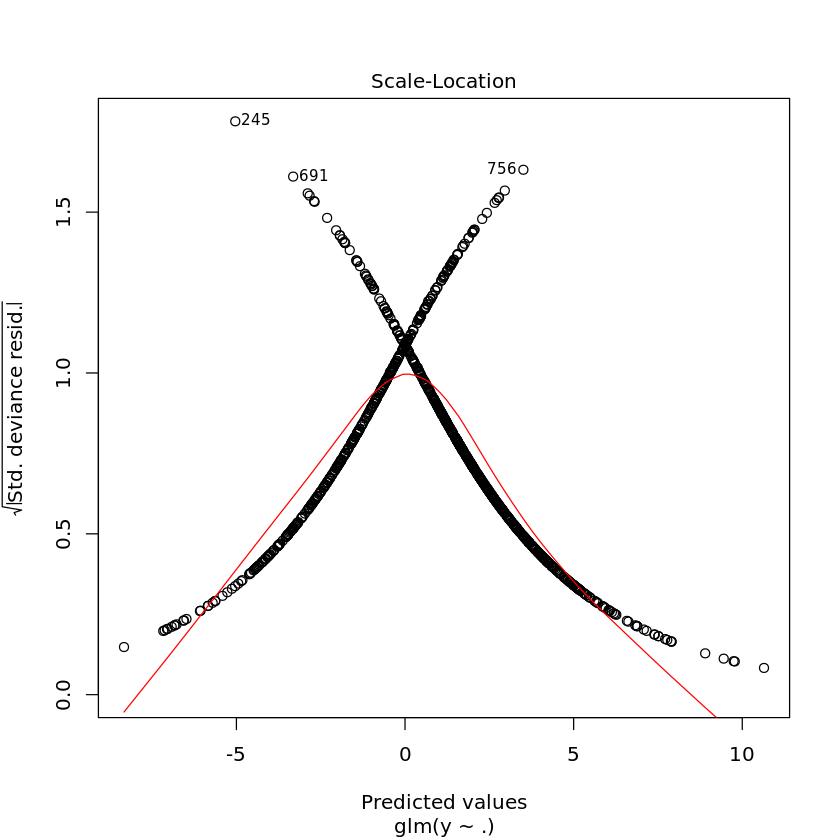

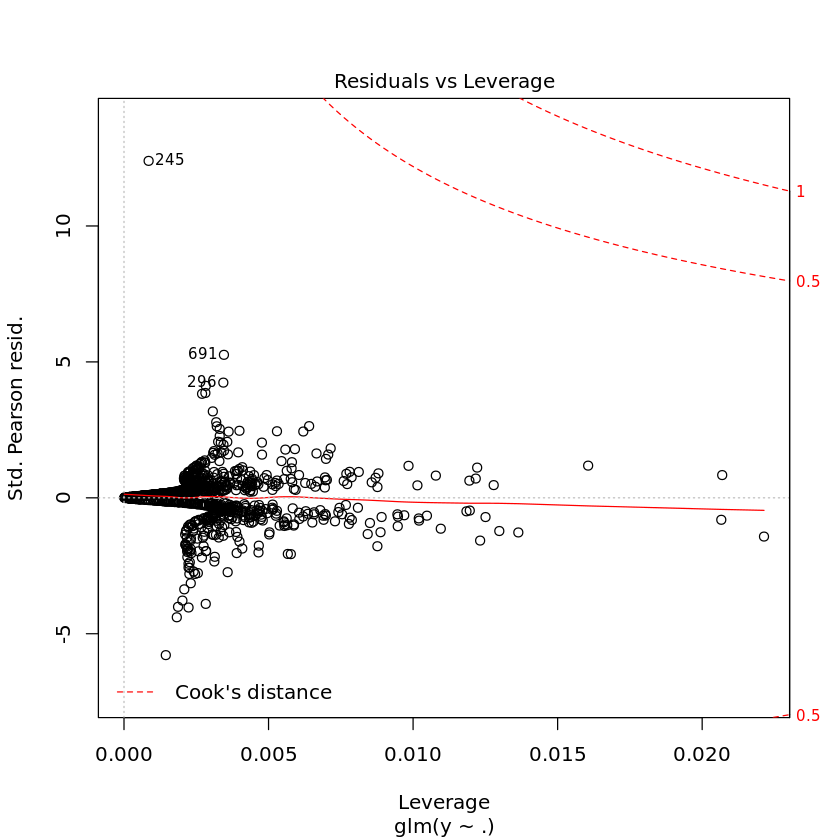

In [10]:
plot(T.glm)